# Python Packages

In [ ]:
# Install required Python packages, including "request", "wget", "rdkit", "molvs" and "iterative-stratification"
!pip -q install requests wget rdkit-pypi molvs iterative-stratification

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 74.9 MB/s eta 0:00:00


In [ ]:
# Import the libraries and print their versions
import requests                             # Send HTTP requests to access web resources
import wget                                 # Download files from a URL
import rdkit                                # Cheminformatics toolkit for molecule handling
import molvs                                # Molecule standardization and validation
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold  # Stratified K-Fold for multi-label data

print("requests version:", requests.__version__)
print("wget version:", wget.__version__)
print("rdkit version:", rdkit.__version__)
print("molvs version:", molvs.__version__)
print("iterative-stratification version:", MultilabelStratifiedKFold.__module__.split('.')[1])

requests version: 2.32.3
wget version: 3.2
rdkit version: 2022.09.5
molvs version: 0.1.1
iterative-stratification version: ml_stratifiers


In [ ]:
# Pandas and NumPy
import pandas as pd                   # Data manipulation
import numpy as np                    # Numerical operations

# Molecular descriptors calculation
!pip install -q PubChemPy==1.0.4      # Install PubChemPy
import pubchempy as pcp               # Access chemical data from PubChem
from pubchempy import get_compounds, Compound  # Retrieve compound data
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors, DataStructs, MACCSkeys, Descriptors  # Generate molecular descriptors & fingerprints
from rdkit.DataStructs import ExplicitBitVect          # Handle molecular bit vectors
from rdkit.ML.Descriptors import MoleculeDescriptors   # Compute RDKit molecular descriptors
from sklearn.preprocessing import MinMaxScaler         # Normalize features (e.g., RDKit descriptors)

# MolVS for molecule standardization
import molvs as mv                   # Standardize and normalize molecular structures

# Matplotlib for plotting
from matplotlib import pyplot as plt  # Plotting visuals

# Dataset

In [ ]:
# Import Tox21 dataset
from google.colab import files
upload = files.upload()

Saving tox21_all-clean.csv to tox21_all-clean.csv


In [ ]:
tox21_data = pd.read_csv('tox21_all-clean.csv')

In [1]:
# Import Human in vivo toxicity data
from google.colab import files
upload = files.upload()

Saving in_vivo_data.csv to in_vivo_data.csv


In [4]:
in_vivo_data = pd.read_csv('in_vivo_data.csv')
in_vivo_data.shape

(2389, 10)

In [ ]:
# Clean data
in_vivo_data_tr = in_vivo_data[~(in_vivo_data['SMILES'].isnull())].reset_index(drop=True)
in_vivo_data_tr

,CAS,Name,SMILES,Carcinogenicity,Cardiotoxicity,Developmental toxicity,Hepatotoxicity,Nephrotoxicity,Neurotoxicity,Reproductive toxicity
0,100-06-1,4'-Methoxyacetophenone,COC1=CC=C(C=C1)C(C)=O,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,100-11-8,4-Nitrobenzyl bromide,[O-][N+](=O)C1=CC=C(CBr)C=C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100-14-1,4-Nitrobenzyl chloride,[O-][N+](=O)C1=CC=C(CCl)C=C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100-37-8,2-(Diethylamino)ethanol,CCN(CC)CCO,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100-39-0,BENZYL BROMIDE,BrCC1=CC=CC=C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2355,84449-90-1,raloxifene,C1CCN(CC1)CCOC2=CC=C(C=C2)C(=O)C3=C(SC4=C3C=CC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2356,1244-76-4,Hydroxyzine hydrochloride,C1CN(CCN1CCOCCO)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl.Cl,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2357,68-88-2,hydroxyzine,C1CN(CCN1CCOCCO)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2358,10034-93-2,Hydrazine sulfate,NN.OS(=O)(=O)O,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y = in_vivo_data_tr [in_vivo_data_tr['CAS'].isin(tox21_data['CAS'])].iloc[:,4:10].reset_index(drop=True)
y

,Cardiotoxicity,Developmental toxicity,Hepatotoxicity,Nephrotoxicity,Neurotoxicity,Reproductive toxicity
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1738,0.0,0.0,0.0,0.0,0.0,0.0
1739,1.0,0.0,1.0,0.0,1.0,0.0
1740,0.0,0.0,0.0,0.0,0.0,0.0
1741,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# combine tox21 data with name and CAS
X_CAS = in_vivo_data.iloc[:,[0,2]] # reference CAS
X_tox21 = pd.merge(X_CAS, tox21_data, on = 'CAS', how='inner').reset_index(drop=True)
X_tox21 = X_tox21[~(X_tox21['SMILES'].isnull())]
X_tox21['SMILES'].isnull().sum()

np.int64(0)

In [ ]:
X_tox21

,CAS,SMILES,ID,tox21-ache-p3_ache-inhibitor_1,tox21-ache-p5_ache-inhibitor_1,tox21-ahr-p1_ahr-agonist_1,tox21-ap1-agonist-p1_ap1-agonist_1,tox21-ar-bla-agonist-p1_ar-agonist_1,tox21-ar-bla-antagonist-p1_ar-antagonist_1,tox21-are-bla-p1_nrf2-agonist_1,...,tox21-sbe-bla-agonist-p1_sbe-agonist_1,tox21-sbe-bla-antagonist-p1_sbe-antagonist_1,tox21-shh-3t3-gli3-agonist-p1_shh-agonist_1,tox21-shh-3t3-gli3-antagonist-p1_shh-antagonist_1,tox21-trhr-hek293-p1_trhr-agonist_1,tox21-trhr-hek293-p1_trhr-antagonist_1,tox21-tshr-agonist-p1_tshr-agonist_1,tox21-tshr-antagonist-p1_tshr-antagonist_1,tox21-vdr-bla-agonist-p1_vdr-agonist_1,tox21-vdr-bla-antagonist-p1_vdr-antagonist_1
0,100-06-1,COC1=CC=C(C=C1)C(C)=O,DTXSID2044347,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100-11-8,[O-][N+](=O)C1=CC=C(CBr)C=C1,DTXSID7049392,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100-14-1,[O-][N+](=O)C1=CC=C(CCl)C=C1,DTXSID4025745,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,100-37-8,CCN(CC)CCO,DTXSID5021837,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,100-39-0,BrCC1=CC=CC=C1,DTXSID8024658,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,84449-90-1,C1CCN(CC1)CCOC2=CC=C(C=C2)C(=O)C3=C(SC4=C3C=CC...,DTXSID3023550,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,1244-76-4,C1CN(CCN1CCOCCO)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl.Cl,DTXSID5047530,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1740,68-88-2,C1CN(CCN1CCOCCO)C(C2=CC=CC=C2)C3=CC=C(C=C3)Cl,DTXSID8023137,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1741,10034-93-2,NN.OS(=O)(=O)O,DTXSID8020703,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Chemical Distribution

Toxicity Endpoint       | Toxic Count | Toxic Proportion | Nontoxic Count | Nontoxic Proportion
-------------------------------------------------------------------------------------
Reproductive toxicity    633          36.32%            1110            63.68%
Neurotoxicity            1060         60.81%            683             39.19%
Nephrotoxicity           788          45.21%            955             54.79%
Hepatotoxicity           776          44.52%            967             55.48%
Developmental toxicity   795          45.61%            948             54.39%
Cardiotoxicity           854          49.00%            889             51.00%


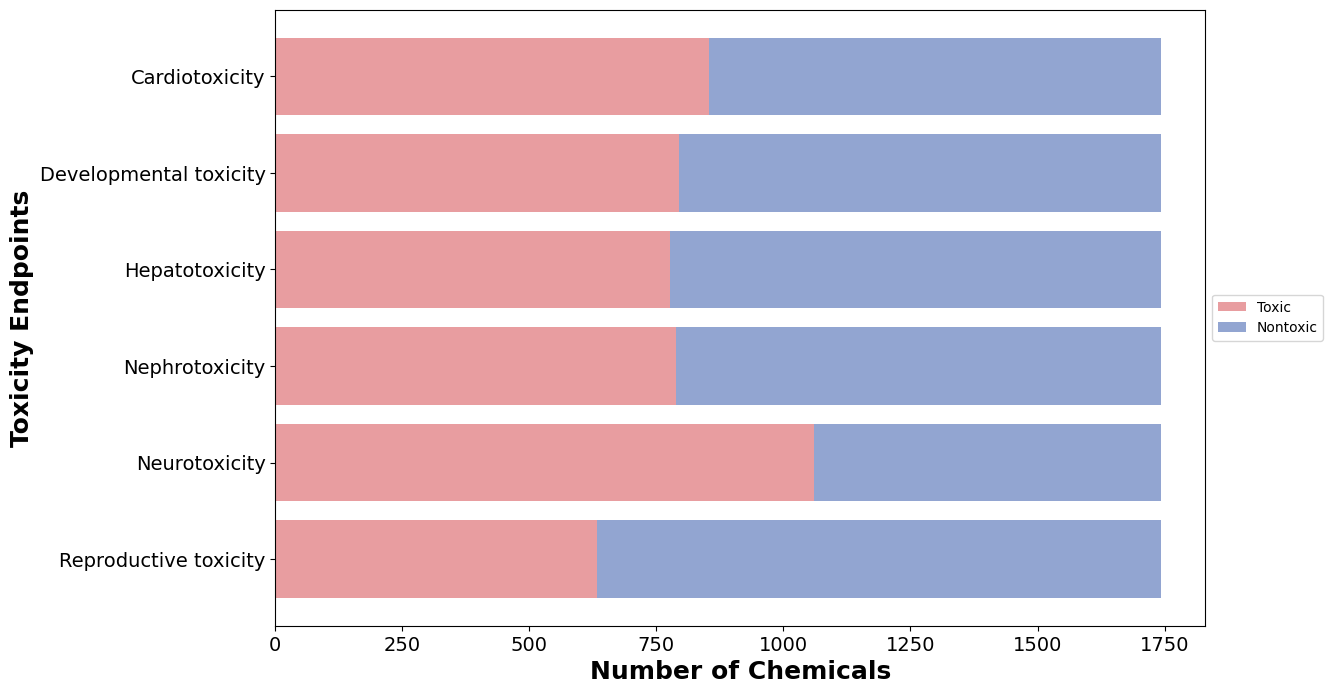

In [ ]:
# Selecting the relevant columns for plotting
categories = [
    'Reproductive toxicity','Neurotoxicity', 'Nephrotoxicity',
    'Hepatotoxicity', 'Developmental toxicity','Cardiotoxicity'
]

# Calculate toxic and nontoxic counts
toxic_counts = y[categories].sum()
total_counts = y[categories].count()
nontoxic_counts = total_counts - toxic_counts

# Calculate proportions
toxic_proportions = toxic_counts / total_counts
nontoxic_proportions = nontoxic_counts / total_counts

# Print toxic and nontoxic counts and proportions in the desired format
print("Toxicity Endpoint       | Toxic Count | Toxic Proportion | Nontoxic Count | Nontoxic Proportion")
print("-" * 85)
for cat in categories:
    print(f"{cat:<24} {int(toxic_counts[cat]):<12} {toxic_proportions[cat]:<17.2%} "
          f"{int(nontoxic_counts[cat]):<15} {nontoxic_proportions[cat]:.2%}")

# Creating a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': categories,
    'Toxic': toxic_counts.values,
    'Nontoxic': nontoxic_counts.values
})

# Plotting the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars
bar_width = 0.5
bars1 = ax.barh(plot_data['Category'], plot_data['Toxic'], color='#E89DA0', label='Toxic')
bars2 = ax.barh(plot_data['Category'], plot_data['Nontoxic'], left=plot_data['Toxic'], color='#92A5D1', label='Nontoxic')

# Adding the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Increasing the font size of tick labels
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Adding labels
ax.set_xlabel('Number of Chemicals', fontsize=18, fontweight='bold')
ax.set_ylabel('Toxicity Endpoints', fontsize=18, fontweight='bold')

# Save and display the plot
plt.savefig("data_distribution.tiff", dpi=300, bbox_inches='tight')
plt.show()

# Molecular Descriptors

In [ ]:
# Define a function that transforms SMILES string into RDKIT descriptors
def cal_rdkit_descr(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    mol_descriptors = []
    for mol in mols:
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        mol_descriptors.append(descriptors)

    return pd.DataFrame(mol_descriptors, columns=["rdkit_" + str(i) for i in desc_names])


# Define a function that transforms a SMILES string into an FCFP (if use_features = TRUE) or--
# --the Extended-Connectivity Fingerprints (ECFP) descriptors (if use_features = FALSE)

def cal_ECFP6_descr(smiles,
            R = 3,
            nBits = 2**10, # nBits = 1024
            use_features = False,
            use_chirality = False):

   '''
   Inputs:
   - smiles...SMILES string of input compounds
   - R....Maximum radius of circular substructures--By using this radius parameter, we compute ECFP6 (the equivalent of radius 3)
   - nBits....number of bits, default is 2048. 1024 is also widely used.
   - use_features...if true then use pharmacophoric atom features (FCFPs), if false then use standard DAYLIGHT atom features (ECFP)
   - use_chirality...if true then append tetrahedral chirality flags to atom features
   Outputs:
   - pd.DataFrame...ECFP or FCFPs with length nBits and maximum radus R

   '''
   mols = [AllChem.MolFromSmiles(i) for i in smiles]

   ecfp_descriptors = []
   for mol in mols:
        ecfp = AllChem.GetMorganFingerprintAsBitVect(mol,
                                radius = R,
                                nBits = nBits,
                                useFeatures = use_features,
                                useChirality = use_chirality)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(ecfp, array)
        ecfp_descriptors.append(ecfp)

   return pd.DataFrame([list(l) for l in ecfp_descriptors], columns=[f'ECFP6_Bit_{i}' for i in range(nBits)])


# Define a function that transforms a SMILES string into an FCFP (if use_features = TRUE)
def cal_FCFP6_descr(smiles,
            R = 3,
            nBits = 2**10, # nBits = 1024
            use_features = True,
            use_chirality = False):

   mols = [AllChem.MolFromSmiles(i) for i in smiles]

   fcfp_descriptors = []
   for mol in mols:
        fcfp = AllChem.GetMorganFingerprintAsBitVect(mol,
                                radius = R,
                                nBits = nBits,
                                useFeatures = use_features,
                                useChirality = use_chirality)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fcfp, array)
        fcfp_descriptors.append(fcfp)

   return pd.DataFrame([list(l) for l in fcfp_descriptors], columns=[f'FCFP6_Bit_{i}' for i in range(nBits)])


# Define a function that transforms a SMILES string into an MACCS fingerprints

def cal_MACCS_descr(smiles):

   mols = [Chem.MolFromSmiles(i) for i in smiles]
   MACCS_descriptors = []
   for mol in mols:
        fp = MACCSkeys.GenMACCSKeys (mol)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, array)
        MACCS_descriptors.append(fp)

   return pd.DataFrame([list(l) for l in MACCS_descriptors], columns=[f'MACCS_Bit_{i}' for i in range(167)])

In [ ]:
# Calculating RDKit descriptors
rdkit_descrs = cal_rdkit_descr(smiles=X_tox21['SMILES'])

In [ ]:
# Check for missing values
missing_data = rdkit_descrs.isnull().sum()
missing_columns = missing_data[missing_data > 0]

# Print columns with missing values and how many missing values they have
if not missing_columns.empty:
    print("Columns with missing values:\n", missing_columns)
else:
    print("No missing data found.")

Columns with missing values:
 rdkit_MaxPartialCharge       15
rdkit_MinPartialCharge       15
rdkit_MaxAbsPartialCharge    15
rdkit_MinAbsPartialCharge    15
rdkit_BCUT2D_MWHI            42
rdkit_BCUT2D_MWLOW           42
rdkit_BCUT2D_CHGHI           42
rdkit_BCUT2D_CHGLO           42
rdkit_BCUT2D_LOGPHI          42
rdkit_BCUT2D_LOGPLOW         42
rdkit_BCUT2D_MRHI            42
rdkit_BCUT2D_MRLOW           42
dtype: int64


In [ ]:
rdkit_descrs_clean = rdkit_descrs.drop(columns=missing_columns.index)

In [ ]:
# Applying feature scaling for RDKit descriptors
scaler = MinMaxScaler()
X_rdkit_descrs = rdkit_descrs_clean
X_rdkit = scaler.fit_transform(X_rdkit_descrs)
X_rdkit = pd.DataFrame(X_rdkit, columns = rdkit_descrs_clean.columns.values.tolist())
X_rdkit .insert(0, 'CAS', X_tox21['CAS'].values, False)

In [ ]:
X_rdkit_NCAS = X_rdkit.drop(columns=['CAS'])

In [ ]:
# ECFP
X_ECFP = cal_ECFP6_descr(smiles=X_tox21['SMILES'])
X_ECFP.insert(0, 'CAS', X_tox21['CAS'].values, False)
X_ECFP_NCAS = X_ECFP.drop(columns=['CAS'])

# FCFP
X_FCFP = cal_FCFP6_descr(smiles=X_tox21['SMILES'])
X_FCFP.insert(0, 'CAS', X_tox21['CAS'].values, False)
X_FCFP_NCAS = X_FCFP.drop(columns=['CAS'])

# MACCS
X_MACCS = cal_MACCS_descr(smiles=X_tox21['SMILES'])
X_MACCS.insert(0, 'CAS', X_tox21['CAS'].values, False)
X_MACCS_NCAS = X_MACCS.drop(columns=['CAS'])

**Three Feature Scenarios**

1. **only tox21** (X_tox21_tr)
2. **only descriptor** (X_rdkit, X_ECFP, X_FCFP, X_MACCS, X_all)
3. **tox21 + descriptor** (X_rdkit_tox21, X_ECFP_tox21, X_FCFP_tox21, X_MACCS_tox21, X_all_tox21)

In [ ]:
# Scenario 1
X_tox21_tr = X_tox21.drop(['SMILES','ID'], axis=1)
X_tox21_tr_NCAS = X_tox21_tr.drop(columns=['CAS'])

In [ ]:
# Scenario 2
X_all = pd.merge(X_rdkit, X_ECFP, on='CAS', how='inner')\
                .merge(X_FCFP, on='CAS', how='inner')\
                .merge(X_MACCS, on='CAS', how='inner')
X_all_NCAS = X_all.drop(columns=['CAS'])

In [ ]:
# Scenario 3

# Tox21+RDKit
X_rdkit_tox21 = pd.merge(X_rdkit, X_tox21_tr, on = 'CAS', how='inner')
X_rdkit_tox21_NCAS = X_rdkit_tox21.drop(columns=['CAS'])

# Tox21+ECFP
X_ECFP_tox21 = pd.merge(X_ECFP, X_tox21_tr, on = 'CAS', how='inner')
X_ECFP_tox21_NCAS = X_ECFP_tox21.drop(columns=['CAS'])

# Tox21+FCFP
X_FCFP_tox21 = pd.merge(X_FCFP, X_tox21_tr, on = 'CAS', how='inner')
X_FCFP_tox21_NCAS = X_FCFP_tox21.drop(columns=['CAS'])

# Tox21+MACCS
X_MACCS_tox21 = pd.merge(X_MACCS, X_tox21_tr, on = 'CAS', how='inner')
X_MACCS_tox21_NCAS = X_MACCS_tox21.drop(columns=['CAS'])

# Tox21+All
X_all_tox21 = pd.merge(X_rdkit, X_ECFP, on='CAS', how='inner')\
                .merge(X_FCFP, on='CAS', how='inner')\
                .merge(X_MACCS, on='CAS', how='inner')\
                .merge(X_tox21_tr, on='CAS', how='inner')
X_all_tox21_NCAS = X_all_tox21.drop(columns=['CAS'])

# Classification QSAR Models


In [ ]:
!pip install iterative-stratification

In [ ]:
!pip install tensorflow keras keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [ ]:
import keras_tuner as kt
print("keras-tuner version:", kt.__version__)

keras-tuner version: 1.4.7


In [ ]:
# Basic packages
import numpy as np                # Numerical operations
import pandas as pd               # Data manipulation
import seaborn as sns             # Statistical visualization
import pickle                     # Save/load Python objects
import joblib                     # Efficient model serialization

# Visualization
import matplotlib.pyplot as plt   # Plotting
from mpl_toolkits.axes_grid1 import make_axes_locatable  # Layout tools for colorbars
import matplotlib.colors as colors                       # Color normalization
import matplotlib as mpl          # Matplotlib config/utilities

# Cross-validation and model selection
from sklearn.model_selection import RepeatedKFold       # Repeated K-Fold CV
from sklearn.model_selection import train_test_split    # Train-test splitting
from sklearn.model_selection import GridSearchCV        # Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold     # Stratified K-Fold CV
from sklearn.model_selection import cross_val_score     # CV scoring

# Multi-label cross-validation
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold  # Stratified K-Fold for multi-label data

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2  # Chi-squared feature selection

# Data preprocessing
from sklearn.preprocessing import StandardScaler         # Standardization

# Evaluation metrics
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier      # Random Forest
from sklearn.tree import DecisionTreeClassifier          # Decision Tree
from sklearn.svm import SVC                              # Support Vector Classifier
from sklearn.multiclass import OneVsRestClassifier       # Multi-label strategy


# Deep learning with Keras
from tensorflow import keras                       # TensorFlow Keras
from keras.models import Sequential, load_model    # Model building/loading
from keras.layers import Dense, Dropout            # Core layers
from keras import regularizers, layers             # Regularization, layers
from keras.optimizers import SGD, Adam             # Optimizers
from keras.callbacks import EarlyStopping          # Early stopping
from tensorflow.keras import Input                 # Input layer
from tensorflow.keras.models import save_model     # Save model
from keras_tuner import BayesianOptimization       # Hyperparameter tuning

## Decision Trees (DT)

In [ ]:
# Function to plot ROC curves for the best model
def plot_best_roc_curve(y_true, y_pred_proba, label, feature_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], color='black', linestyle='-')  # Add diagonal line, a random classifier in ROC analysis, which serves as a baseline
    plt.title(f"Best ROC Curve - {feature_name}", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best')
    plt.grid()

# List of feature sets and their names
feature_sets = [X_tox21_tr_NCAS]   # only Tox21
feature_names = ['X_tox21']

#feature_sets = [X_rdkit_NCAS, X_ECFP_NCAS, X_FCFP_NCAS, X_MACCS_NCAS, X_all_NCAS]   # only molecular descriptors
#feature_names = ['X_rdkit', 'X_ECFP', 'X_FCFP', 'X_MACCS', 'X_all']

#feature_sets = [X_rdkit_tox21_NCAS, X_ECFP_tox21_NCAS, X_FCFP_tox21_NCAS, X_MACCS_tox21_NCAS, X_all_tox21_NCAS]  # Tox21+molecular descriptors
#feature_names = ['X_rdkit_tox21', 'X_ECFP_tox21', 'X_FCFP_tox21', 'X_MACCS_tox21', 'X_all_tox21']

# Check for shape consistency between feature sets and labels
for feature_set, feature_name in zip(feature_sets, feature_names):
    assert feature_set.shape[0] == y.shape[0], f"Mismatch between {feature_name} and y: {feature_set.shape[0]} vs {y.shape[0]}"

# Setting up the outer and inner cross-validation loops
outer_cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = MultilabelStratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Setting up hyperparameter tuning for Decision Trees
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Iterate over each feature set
for feature_set, feature_name in zip(feature_sets, feature_names):
    print(f"Running nested cross-validation for feature set: {feature_name}")

    overall_best_model = None
    overall_best_params = None
    overall_best_acc = -np.inf
    overall_best_selected_features = None
    overall_best_metrics = {}

    # To store metrics of the best model
    roc_auc_all_folds = []
    ba_all_folds = []
    precision_all_folds = []
    recall_all_folds = []
    f1_all_folds = []

    # Iterate over the outer cross-validation folds
    for fold_num, (outer_train_ix, outer_test_ix) in enumerate(outer_cv.split(feature_set, y), start=1):
        X_train_outer, X_test_outer = feature_set.iloc[outer_train_ix], feature_set.iloc[outer_test_ix]
        y_train_outer, y_test_outer = y.iloc[outer_train_ix], y.iloc[outer_test_ix]

        Best_model = None
        best_acc = 0
        roc_values = []
        ba_values = []
        pre_values = []
        rec_values = []
        f1_values = []
        selected_features_list = []

        for inner_train_ix, inner_test_ix in inner_cv.split(X_train_outer, y_train_outer):
            X_train_inner, X_test_inner = X_train_outer.iloc[inner_train_ix], X_train_outer.iloc[inner_test_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_ix], y_train_outer.iloc[inner_test_ix]

            # Apply feature selection with SelectKBest (chi-squared)
            #k_value = int(feature_set.shape[1] * 0.2)   # WITH Feature Selection: Select top 20% of features
            #select_feature = SelectKBest(chi2, k=k_value)
            select_feature = SelectKBest(chi2, k='all')  # WITHOUT Feature Selection: all features are included
            X_train_inner_selected = select_feature.fit_transform(X_train_inner, y_train_inner)
            X_test_inner_selected = select_feature.transform(X_test_inner)

            # Hyperparameter tuning with GridSearchCV
            grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
            grid_search.fit(X_train_inner_selected, y_train_inner)

            # Get the best model
            acc = grid_search.score(X_test_inner_selected, y_test_inner)
            if acc > best_acc:
                best_acc = acc
                Best_model = grid_search.best_estimator_
                selected_features_list = select_feature.get_support(indices=True)  # Store selected feature indices

        X_train_outer_selected = select_feature.transform(X_train_outer)
        X_test_outer_selected = select_feature.transform(X_test_outer)

        # Evaluate the best model on the outer test set
        y_pred_proba = np.array(Best_model.predict_proba(X_test_outer_selected))

        # Store metrics for the current fold
        fold_roc_values = []
        fold_ba_values = []
        fold_precision_values = []
        fold_recall_values = []
        fold_f1_values = []

        for label_idx in range(y_test_outer.shape[1]):
            y_true_outer_label = y_test_outer.iloc[:, label_idx]
            y_pred_outer_label = y_pred_proba[label_idx][:, 1]  # Class 1 probability for the label

            # Calculate ROC-AUC score
            roc_auc = roc_auc_score(y_true_outer_label, y_pred_outer_label)
            fold_roc_values.append(roc_auc)

            # Calculate Balanced Accuracy
            y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_outer_label]  # Binarize the predictions
            ba = balanced_accuracy_score(y_true_outer_label, y_pred_binary)
            fold_ba_values.append(ba)

            # Calculate Precision
            precision = precision_score(y_true_outer_label, y_pred_binary)
            fold_precision_values.append(precision)

            # Calculate Recall
            recall = recall_score(y_true_outer_label, y_pred_binary)
            fold_recall_values.append(recall)

            # Calculate F1-Score
            f1 = f1_score(y_true_outer_label, y_pred_binary)
            fold_f1_values.append(f1)

        # Track the model with the best performance across all outer folds
        mean_roc_auc = np.mean(fold_roc_values)
        if mean_roc_auc > overall_best_acc:
            overall_best_acc = mean_roc_auc
            overall_best_model = Best_model
            overall_best_params = grid_search.best_params_
            overall_best_selected_features = selected_features_list
            overall_best_metrics = {
                "roc_auc": fold_roc_values,
                "balanced_accuracy": fold_ba_values,
                "precision": fold_precision_values,
                "recall": fold_recall_values,
                "f1_score": fold_f1_values
            }

            # Append metrics for the current fold
            roc_auc_all_folds.append(fold_roc_values)
            ba_all_folds.append(fold_ba_values)
            precision_all_folds.append(fold_precision_values)
            recall_all_folds.append(fold_recall_values)
            f1_all_folds.append(fold_f1_values)

    # Once the best model is identified, plot the ROC-AUC curves for the best model
    y_pred_proba_best = np.array(overall_best_model.predict_proba(X_test_outer_selected))
    plt.figure(figsize=(10, 8))
    for label_idx in range(y_test_outer.shape[1]):
        y_true_best_label = y_test_outer.iloc[:, label_idx]
        y_pred_best_label = y_pred_proba_best[label_idx][:, 1]  # Class 1 probability
        plot_best_roc_curve(y_true_best_label, y_pred_best_label, y.columns[label_idx], feature_name)

    plt.show()

    # Print the best overall model parameters and performance
    print(f"\nBest Model for Feature Set: {feature_name}")
    print(f"Best Hyperparameters: {overall_best_params}")
    print(f"Best ROC-AUC: {overall_best_acc}")

    print(f"Number of selected features for the best model: {len(overall_best_selected_features)}")
    print(f"Selected feature indices: {overall_best_selected_features}")

    selected_feature_names = feature_set.columns[overall_best_selected_features]
    print(f"Selected feature names: {list(selected_feature_names)}")

    # Convert the lists of performance metrics to DataFrames
    roc_auc_df = pd.DataFrame(roc_auc_all_folds).T
    ba_df = pd.DataFrame(ba_all_folds).T
    precision_df = pd.DataFrame(precision_all_folds).T
    recall_df = pd.DataFrame(recall_all_folds).T
    f1_df = pd.DataFrame(f1_all_folds).T

    # Calculate mean and standard deviation across folds for each label
    label_metrics_df = pd.DataFrame({
        'Label': [f'{label}' for label in y.columns],  # Ensure that the length of 'y.columns' matches
        'ROC-AUC': roc_auc_df.mean(axis=1),
        'ROC-AUC-sd': roc_auc_df.std(axis=1),
        'BA': ba_df.mean(axis=1),
        'BA-sd': ba_df.std(axis=1),
        'Precision': precision_df.mean(axis=1),
        'Precision-sd': precision_df.std(axis=1),
        'Recall': recall_df.mean(axis=1),
        'Recall-sd': recall_df.std(axis=1),
        'F1-Score': f1_df.mean(axis=1),
        'F1-Score-sd': f1_df.std(axis=1)
    })

    print(label_metrics_df)
    label_metrics_df.to_csv(f"label_metrics_DT_1Tox_NFS_{feature_name}_1023_WITH ROC-AUC.csv", index=False)

## Randon Forest (RF)

In [ ]:
# Function to plot ROC curves for the best model
def plot_best_roc_curve(y_true, y_pred_proba, label, feature_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], color='black', linestyle='-')  # Add diagonal line, a random classifier in ROC analysis, which serves as a baseline
    plt.title(f"Best ROC Curve - {feature_name}", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best')
    plt.grid()

# List of feature sets and their names
feature_sets = [X_tox21_tr_NCAS]   # only Tox21
feature_names = ['X_tox21']

#feature_sets = [X_rdkit_NCAS, X_ECFP_NCAS, X_FCFP_NCAS, X_MACCS_NCAS, X_all_NCAS]   # only molecular descriptors
#feature_names = ['X_rdkit', 'X_ECFP', 'X_FCFP', 'X_MACCS', 'X_all']

#feature_sets = [X_rdkit_tox21_NCAS, X_ECFP_tox21_NCAS, X_FCFP_tox21_NCAS, X_MACCS_tox21_NCAS, X_all_tox21_NCAS]  # Tox21+molecular descriptors
#feature_names = ['X_rdkit_tox21', 'X_ECFP_tox21', 'X_FCFP_tox21', 'X_MACCS_tox21', 'X_all_tox21']

# Check for shape consistency between feature sets and labels
for feature_set, feature_name in zip(feature_sets, feature_names):
    assert feature_set.shape[0] == y.shape[0], f"Mismatch between {feature_name} and y: {feature_set.shape[0]} vs {y.shape[0]}"

# Setting up the outer and inner cross-validation loops
outer_cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = MultilabelStratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Setting up hyperparameter tuning for Randon Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Iterate over each feature set
for feature_set, feature_name in zip(feature_sets, feature_names):
    print(f"Running nested cross-validation for feature set: {feature_name}")

    overall_best_model = None
    overall_best_params = None
    overall_best_acc = -np.inf
    overall_best_selected_features = None
    overall_best_metrics = {}

    # To store metrics of the best model
    roc_auc_all_folds = []
    ba_all_folds = []
    precision_all_folds = []
    recall_all_folds = []
    f1_all_folds = []

    # Iterate over the outer cross-validation folds
    for fold_num, (outer_train_ix, outer_test_ix) in enumerate(outer_cv.split(feature_set, y), start=1):
        X_train_outer, X_test_outer = feature_set.iloc[outer_train_ix], feature_set.iloc[outer_test_ix]
        y_train_outer, y_test_outer = y.iloc[outer_train_ix], y.iloc[outer_test_ix]

        Best_model = None
        best_acc = 0
        roc_values = []
        ba_values = []
        pre_values = []
        rec_values = []
        f1_values = []
        selected_features_list = []

        for inner_train_ix, inner_test_ix in inner_cv.split(X_train_outer, y_train_outer):
            X_train_inner, X_test_inner = X_train_outer.iloc[inner_train_ix], X_train_outer.iloc[inner_test_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_ix], y_train_outer.iloc[inner_test_ix]

            # Apply feature selection with SelectKBest (chi-squared)
            #k_value = int(feature_set.shape[1] * 0.2)   # WITH Feature Selection: Select top 20% of features
            #select_feature = SelectKBest(chi2, k=k_value)
            select_feature = SelectKBest(chi2, k='all')  # WITHOUT Feature Selection: all features are included
            X_train_inner_selected = select_feature.fit_transform(X_train_inner, y_train_inner)
            X_test_inner_selected = select_feature.transform(X_test_inner)

            # Hyperparameter tuning with GridSearchCV
            grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
            grid_search.fit(X_train_inner_selected, y_train_inner)

            # Get the best model
            acc = grid_search.score(X_test_inner_selected, y_test_inner)
            if acc > best_acc:
                best_acc = acc
                Best_model = grid_search.best_estimator_
                selected_features_list = select_feature.get_support(indices=True)  # Store selected feature indices

        X_train_outer_selected = select_feature.transform(X_train_outer)
        X_test_outer_selected = select_feature.transform(X_test_outer)

        # Evaluate the best model on the outer test set
        y_pred_proba = np.array(Best_model.predict_proba(X_test_outer_selected))

        # Store metrics for the current fold
        fold_roc_values = []
        fold_ba_values = []
        fold_precision_values = []
        fold_recall_values = []
        fold_f1_values = []

        for label_idx in range(y_test_outer.shape[1]):
            y_true_outer_label = y_test_outer.iloc[:, label_idx]
            y_pred_outer_label = y_pred_proba[label_idx][:, 1]  # Class 1 probability for the label

            # Calculate ROC-AUC score
            roc_auc = roc_auc_score(y_true_outer_label, y_pred_outer_label)
            fold_roc_values.append(roc_auc)

            # Calculate Balanced Accuracy
            y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_outer_label]  # Binarize the predictions
            ba = balanced_accuracy_score(y_true_outer_label, y_pred_binary)
            fold_ba_values.append(ba)

            # Calculate Precision
            precision = precision_score(y_true_outer_label, y_pred_binary)
            fold_precision_values.append(precision)

            # Calculate Recall
            recall = recall_score(y_true_outer_label, y_pred_binary)
            fold_recall_values.append(recall)

            # Calculate F1-Score
            f1 = f1_score(y_true_outer_label, y_pred_binary)
            fold_f1_values.append(f1)

        # Track the model with the best performance across all outer folds
        mean_roc_auc = np.mean(fold_roc_values)
        if mean_roc_auc > overall_best_acc:
            overall_best_acc = mean_roc_auc
            overall_best_model = Best_model
            overall_best_params = grid_search.best_params_
            overall_best_selected_features = selected_features_list
            overall_best_metrics = {
                "roc_auc": fold_roc_values,
                "balanced_accuracy": fold_ba_values,
                "precision": fold_precision_values,
                "recall": fold_recall_values,
                "f1_score": fold_f1_values
            }

            # Append metrics for the current fold
            roc_auc_all_folds.append(fold_roc_values)
            ba_all_folds.append(fold_ba_values)
            precision_all_folds.append(fold_precision_values)
            recall_all_folds.append(fold_recall_values)
            f1_all_folds.append(fold_f1_values)

    # Once the best model is identified, plot the ROC-AUC curves for the best model
    y_pred_proba_best = np.array(overall_best_model.predict_proba(X_test_outer_selected))
    plt.figure(figsize=(10, 8))
    for label_idx in range(y_test_outer.shape[1]):
        y_true_best_label = y_test_outer.iloc[:, label_idx]
        y_pred_best_label = y_pred_proba_best[label_idx][:, 1]  # Class 1 probability
        plot_best_roc_curve(y_true_best_label, y_pred_best_label, y.columns[label_idx], feature_name)

    plt.show()

    # Print the best overall model parameters and performance
    print(f"\nBest Model for Feature Set: {feature_name}")
    print(f"Best Hyperparameters: {overall_best_params}")
    print(f"Best ROC-AUC: {overall_best_acc}")

    print(f"Number of selected features for the best model: {len(overall_best_selected_features)}")
    print(f"Selected feature indices: {overall_best_selected_features}")

    selected_feature_names = feature_set.columns[overall_best_selected_features]
    print(f"Selected feature names: {list(selected_feature_names)}")

    # Convert the lists of performance metrics to DataFrames
    roc_auc_df = pd.DataFrame(roc_auc_all_folds).T
    ba_df = pd.DataFrame(ba_all_folds).T
    precision_df = pd.DataFrame(precision_all_folds).T
    recall_df = pd.DataFrame(recall_all_folds).T
    f1_df = pd.DataFrame(f1_all_folds).T

    # Calculate mean and standard deviation across folds for each label
    label_metrics_df = pd.DataFrame({
        'Label': [f'{label}' for label in y.columns],  # Ensure that the length of 'y.columns' matches
        'ROC-AUC': roc_auc_df.mean(axis=1),
        'ROC-AUC-sd': roc_auc_df.std(axis=1),
        'BA': ba_df.mean(axis=1),
        'BA-sd': ba_df.std(axis=1),
        'Precision': precision_df.mean(axis=1),
        'Precision-sd': precision_df.std(axis=1),
        'Recall': recall_df.mean(axis=1),
        'Recall-sd': recall_df.std(axis=1),
        'F1-Score': f1_df.mean(axis=1),
        'F1-Score-sd': f1_df.std(axis=1)
    })

    print(label_metrics_df)
    label_metrics_df.to_csv(f"label_metrics_RF_1Tox_NFS_{feature_name}.csv", index=False)

## Support Vector Machine (SVM)

In [ ]:
# Function to plot ROC curves for the best model
def plot_best_roc_curve(y_true, y_pred_proba, label, feature_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], color='black', linestyle='-')  # Add diagonal line, a random classifier in ROC analysis, which serves as a baseline
    plt.title(f"Best ROC Curve - {feature_name}", fontsize=16)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='best')
    plt.grid()

# List of feature sets and their names
feature_sets = [X_tox21_tr_NCAS]   # only Tox21
feature_names = ['X_tox21']

#feature_sets = [X_rdkit_NCAS, X_ECFP_NCAS, X_FCFP_NCAS, X_MACCS_NCAS, X_all_NCAS]   # only molecular descriptors
#feature_names = ['X_rdkit', 'X_ECFP', 'X_FCFP', 'X_MACCS', 'X_all']

#feature_sets = [X_rdkit_tox21_NCAS, X_ECFP_tox21_NCAS, X_FCFP_tox21_NCAS, X_MACCS_tox21_NCAS, X_all_tox21_NCAS]  # Tox21+molecular descriptors
#feature_names = ['X_rdkit_tox21', 'X_ECFP_tox21', 'X_FCFP_tox21', 'X_MACCS_tox21', 'X_all_tox21']

# Check for shape consistency between feature sets and labels
for feature_set, feature_name in zip(feature_sets, feature_names):
    assert feature_set.shape[0] == y.shape[0], f"Mismatch between {feature_name} and y: {feature_set.shape[0]} vs {y.shape[0]}"

# Setting up the outer and inner cross-validation loops
outer_cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = MultilabelStratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Setting up hyperparameter tuning for SVM
param_grid = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__kernel': ['linear', 'rbf'],  # Kernel type
    'estimator__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
}

# Separate code block for SVM Algorithm with OneVsRestClassifier
for feature_set, feature_name in zip(feature_sets, feature_names):
    print(f"Running nested cross-validation for feature set: {feature_name}")

    # Initialize variables to store the best model's performance and parameters
    overall_best_model = None
    overall_best_params = None
    overall_best_acc = -np.inf  # Initialize to a very low value to track best accuracy
    overall_best_metrics = {}
    overall_best_selected_features = None

    # Initialize lists to store performance metrics across all outer folds
    roc_auc_all_folds = []
    ba_all_folds = []
    precision_all_folds = []
    recall_all_folds = []
    f1_all_folds = []

    # Iterate over the outer cross-validation folds
    for fold_num, (outer_train_ix, outer_test_ix) in enumerate(outer_cv.split(feature_set, y), start=1):
        # Get the training and test data for outer fold
        X_train_outer, X_test_outer = feature_set.iloc[outer_train_ix], feature_set.iloc[outer_test_ix]
        y_train_outer, y_test_outer = y.iloc[outer_train_ix], y.iloc[outer_test_ix]

        Best_model = None
        best_acc = 0
        roc_values = []
        ba_values = []
        pre_values = []
        rec_values = []
        f1_values = []
        selected_features_list = []

        # Inner loop for hyperparameter tuning and feature selection
        for inner_train_ix, inner_test_ix in inner_cv.split(X_train_outer, y_train_outer):
            X_train_inner, X_test_inner = X_train_outer.iloc[inner_train_ix], X_train_outer.iloc[inner_test_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_ix], y_train_outer.iloc[inner_test_ix]

            # Apply feature selection with SelectKBest (chi-squared)
            #k_value = int(feature_set.shape[1] * 0.2)     # WITH Feature Selection: Select top 20% of features
            #select_feature = SelectKBest(chi2, k=k_value)
            select_feature = SelectKBest(chi2, k='all')    # WITHOUT Feature Selection: all features are included
            X_train_inner_selected = select_feature.fit_transform(X_train_inner, y_train_inner)
            X_test_inner_selected = select_feature.transform(X_test_inner)

            # Using OneVsRestClassifier for multi-label SVM
            svc = OneVsRestClassifier(SVC(probability=True, random_state=42))
            grid_search = GridSearchCV(svc, param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
            grid_search.fit(X_train_inner_selected, y_train_inner)

            # Get the best model
            acc = grid_search.score(X_test_inner_selected, y_test_inner)
            if acc > best_acc:
                best_acc = acc
                Best_model = grid_search.best_estimator_
                selected_features_list = select_feature.get_support(indices=True)  # Store selected feature indices

        # Apply feature selection on the outer fold data
        X_train_outer_selected = select_feature.transform(X_train_outer)
        X_test_outer_selected = select_feature.transform(X_test_outer)

        # Evaluate the best model on the outer test set
        y_pred_proba = np.array(Best_model.predict_proba(X_test_outer_selected))

        # Store metrics for each label
        fold_roc_values = []
        fold_ba_values = []
        fold_pre_values = []
        fold_rec_values = []
        fold_f1_values = []

        for label_idx in range(y_test_outer.shape[1]):
            y_true_outer_label = y_test_outer.iloc[:, label_idx]
            y_pred_outer_label = y_pred_proba[:, 1]

            # Calculate ROC-AUC score
            roc_auc = roc_auc_score(y_true_outer_label, y_pred_outer_label)
            fold_roc_values.append(roc_auc)

            # Calculate balanced accuracy
            y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_outer_label]  # Binarize the predictions
            ba = balanced_accuracy_score(y_true_outer_label, y_pred_binary)
            fold_ba_values.append(ba)

            # Calculate precision
            precision = precision_score(y_true_outer_label, y_pred_binary)
            fold_pre_values.append(precision)

            # Calculate recall
            recall = recall_score(y_true_outer_label, y_pred_binary)
            fold_rec_values.append(recall)

            # Calculate F1-score
            f1 = f1_score(y_true_outer_label, y_pred_binary)
            fold_f1_values.append(f1)

        # Track the model with the best performance across all outer folds
        mean_roc_auc = np.mean(fold_roc_values)  # Average ROC-AUC across all labels
        if mean_roc_auc > overall_best_acc:  # Compare against previous best accuracy
            overall_best_acc = mean_roc_auc
            overall_best_model = Best_model
            overall_best_params = grid_search.best_params_
            overall_best_selected_features = selected_features_list  # Store the best selected features
            overall_best_metrics = {
                "roc_auc": fold_roc_values,
                "balanced_accuracy": fold_ba_values,
                "precision": fold_pre_values,
                "recall": fold_rec_values,
                "f1_score": fold_f1_values
            }

        # Append metrics for the current fold
        roc_auc_all_folds.append(fold_roc_values)
        ba_all_folds.append(fold_ba_values)
        precision_all_folds.append(fold_pre_values)
        recall_all_folds.append(fold_rec_values)
        f1_all_folds.append(fold_f1_values)

    # Once the best model is identified, plot the ROC-AUC curves for the best model
    y_pred_proba_best = np.array(overall_best_model.predict_proba(X_test_outer_selected))
    plt.figure(figsize=(10, 8))
    for label_idx in range(y_test_outer.shape[1]):
        y_true_best_label = y_test_outer.iloc[:, label_idx]
        y_pred_best_label = y_pred_proba_best[:, 1]
        plot_best_roc_curve(y_true_best_label, y_pred_best_label, y.columns[label_idx], feature_name)

    plt.show()

    # Once all folds are completed, print the best overall model parameters and performance
    print(f"\nBest Model for Feature Set: {feature_name}")
    print(f"Best Hyperparameters: {overall_best_params}")
    print(f"Best ROC-AUC: {overall_best_acc}")

    # Print the number and list of selected features
    print(f"Number of selected features for the best model: {len(overall_best_selected_features)}")
    print(f"Selected feature indices: {overall_best_selected_features}")

    # If you have feature names, you can map them back to the original features:
    selected_feature_names = feature_set.columns[overall_best_selected_features]
    print(f"Selected feature names: {list(selected_feature_names)}")

    # Convert the lists of performance metrics to DataFrames
    roc_auc_df = pd.DataFrame(roc_auc_all_folds).T
    ba_df = pd.DataFrame(ba_all_folds).T
    precision_df = pd.DataFrame(precision_all_folds).T
    recall_df = pd.DataFrame(recall_all_folds).T
    f1_df = pd.DataFrame(f1_all_folds).T

    # Calculate mean and standard deviation across folds for each label
    label_metrics_df = pd.DataFrame({
        'Label': [f'{label}' for label in y.columns],  # Assumes y has column names corresponding to each label
        'ROC-AUC': roc_auc_df.mean(axis=1),
        'ROC-AUC-sd': roc_auc_df.std(axis=1),
        'BA': ba_df.mean(axis=1),
        'BA-sd': ba_df.std(axis=1),
        'Precision': precision_df.mean(axis=1),
        'Precision-sd': precision_df.std(axis=1),
        'Recall': recall_df.mean(axis=1),
        'Recall-sd': recall_df.std(axis=1),
        'F1-Score': f1_df.mean(axis=1),
        'F1-Score-sd': f1_df.std(axis=1)
    })

    # Display the final aggregated metrics
    print(label_metrics_df)

    # Save to a CSV file if needed
    label_metrics_df.to_csv(f"label_metrics_SVM_1Tox_NFS_{feature_name}.csv", index=False)

## Deep Neural Network (DNN)

In [ ]:
# List of feature sets and their names
feature_sets = [X_MACCS_NCAS]
feature_names = ['X_MACCS']

# Check for shape consistency between feature sets and labels
for feature_set, feature_name in zip(feature_sets, feature_names):
    assert feature_set.shape[0] == y.shape[0], f"Mismatch between {feature_name} and y: {feature_set.shape[0]} vs {y.shape[0]}"

# Define the base model using Keras Tuner's HyperModel class
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        # Define the input layer using Input(shape)
        inputs = Input(shape=(X_train_inner_selected.shape[1],))  # Use Input layer

        # First Dense layer with the input from the Input layer
        x = Dense(units=hp.Int('dense-bot', min_value=50, max_value=512, step=2, default=50),
                  activation=hp.Choice('dense_activation', values=['relu', 'tanh', 'sigmoid'], default='relu'))(inputs)

        # Additional Dense layers
        for i in range(hp.Int('number_dense_layers', 1, 3)):
            x = Dense(units=hp.Int('dense_' + str(i), min_value=50, max_value=256, step=2),
                      activation=hp.Choice('act_l1', ['relu', 'tanh', 'sigmoid']))(x)
            # Dropout layer
            x = Dropout(hp.Choice('dropout_' + str(i), values=[0.0, 0.1, 0.2, 0.3, 0.5]))(x)

        # Output layer
        outputs = Dense(y_train_outer.shape[1], activation='sigmoid')(x)  # Multilabel output

        # Create the model
        model = tf.keras.Model(inputs=inputs, outputs=outputs)

        # Optimizer and learning rate
        hp_optimizer = hp.Choice('Optimizer', values=['Adam', 'SGD'])
        if hp_optimizer == 'Adam':
            hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
            optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
        elif hp_optimizer == 'SGD':
            hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
            optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate, nesterov=True, momentum=0.9)

        # Compile the model
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

        return model

    def fit(self, hp, model, *args, **kwargs):
        # Tune the batch size
        hp_batch_size = hp.Int('batch_size', min_value=8, max_value=64, step=8)
        return model.fit(*args, batch_size=hp_batch_size, **kwargs)

# Outer and Inner cross-validation loops
outer_cv = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = MultilabelStratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for feature_set, feature_name in zip(feature_sets, feature_names):
    print(f"Running nested cross-validation for feature set: {feature_name}")

    overall_best_model = None
    overall_best_params = None
    overall_best_acc = -np.inf
    overall_best_selected_features = None

    # To store metrics of the best model
    roc_auc_all_folds = []
    ba_all_folds = []
    precision_all_folds = []
    recall_all_folds = []
    f1_all_folds = []

    # Iterate over the outer cross-validation folds
    for fold_num, (outer_train_ix, outer_test_ix) in enumerate(outer_cv.split(feature_set, y), start=1):
        X_train_outer, X_test_outer = feature_set.iloc[outer_train_ix], feature_set.iloc[outer_test_ix]
        y_train_outer, y_test_outer = y.iloc[outer_train_ix], y.iloc[outer_test_ix]

        best_model = None
        best_acc = 0
        selected_features_list = []

        # Inner loop for hyperparameter tuning and feature selection
        for inner_train_ix, inner_test_ix in inner_cv.split(X_train_outer, y_train_outer):
            X_train_inner, X_test_inner = X_train_outer.iloc[inner_train_ix], X_train_outer.iloc[inner_test_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_ix], y_train_outer.iloc[inner_test_ix]

            # Apply feature selection
            select_feature = SelectKBest(chi2, k='all')  # Select all features (no feature selection)
            X_train_inner_selected = select_feature.fit_transform(X_train_inner, y_train_inner)
            X_test_inner_selected = select_feature.transform(X_test_inner)

            # Bayesian Optimization for hyperparameter tuning
            tuner_bo = kt.BayesianOptimization(
                MyHyperModel(),
                objective=kt.Objective('val_accuracy', direction='max'),
                max_trials=20,  # Number of combinations of hyperparameters to be tried
                overwrite=True,
                executions_per_trial=2, # Execute fewer trials to avoid memory exhaustion
                seed=42,
                directory='my_dir',
                project_name = 'Bayes-nest-cv'
            )

            # Perform the search for the best hyperparameters
            tuner_bo.search(X_train_inner_selected, y_train_inner,
                            validation_data=(X_test_inner_selected, y_test_inner),
                            epochs=150, verbose=0,
                            callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])

            # Get the best model from Bayesian Optimization
            best_hp = tuner_bo.get_best_hyperparameters()[0]
            best_model = tuner_bo.hypermodel.build(best_hp)
            history = best_model.fit(X_train_inner_selected, y_train_inner,
                                     validation_data=(X_test_inner_selected, y_test_inner),
                                     epochs=150, verbose=0)

            acc = best_model.evaluate(X_test_inner_selected, y_test_inner)[1]  # Evaluate accuracy

            if acc > best_acc:
                best_acc = acc
                Best_model = best_model
                selected_features_list = select_feature.get_support(indices=True)  # Store selected feature indices

        # Apply feature selection to outer fold data
        X_train_outer_selected = select_feature.transform(X_train_outer)
        X_test_outer_selected = select_feature.transform(X_test_outer)

        # Evaluate the best model on the outer test set
        y_pred_proba = np.array(Best_model.predict(X_test_outer_selected))

        # Store metrics for the current fold
        fold_roc_values = []
        fold_ba_values = []
        fold_pre_values = []
        fold_rec_values = []
        fold_f1_values = []

        for label_idx in range(y_test_outer.shape[1]):
            y_true_outer_label = y_test_outer.iloc[:, label_idx]
            y_pred_outer_label = y_pred_proba[:, label_idx]

            # Calculate performance metrics
            roc_auc = roc_auc_score(y_true_outer_label, y_pred_outer_label)
            fold_roc_values.append(roc_auc)

            y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred_outer_label]
            ba = balanced_accuracy_score(y_true_outer_label, y_pred_binary)
            fold_ba_values.append(ba)

            precision = precision_score(y_true_outer_label, y_pred_binary)
            fold_pre_values.append(precision)

            recall = recall_score(y_true_outer_label, y_pred_binary)
            fold_rec_values.append(recall)

            f1 = f1_score(y_true_outer_label, y_pred_binary)
            fold_f1_values.append(f1)

            # Always append metrics for the current fold
            roc_auc_all_folds.append(fold_roc_values)
            ba_all_folds.append(fold_ba_values)
            precision_all_folds.append(fold_pre_values)
            recall_all_folds.append(fold_rec_values)
            f1_all_folds.append(fold_f1_values)

            # Track the model with the best performance across all outer folds
            mean_roc_auc = np.mean(fold_roc_values)
            if mean_roc_auc > overall_best_acc:
              overall_best_acc = mean_roc_auc
              overall_best_model = Best_model
              overall_best_params = best_hp.values
              overall_best_selected_features = selected_features_list

    # Calculate mean and standard deviation for each metric across folds
    roc_auc_df = pd.DataFrame(roc_auc_all_folds).T
    ba_df = pd.DataFrame(ba_all_folds).T
    precision_df = pd.DataFrame(precision_all_folds).T
    recall_df = pd.DataFrame(recall_all_folds).T
    f1_df = pd.DataFrame(f1_all_folds).T

    # Print best results after outer CV
    print(f"\nBest Model for Feature Set: {feature_name}")
    print(f"Best Hyperparameters: {overall_best_params}")
    print(f"Best ROC-AUC: {overall_best_acc}")

    print(f"Number of selected features for the best model: {len(overall_best_selected_features)}")
    print(f"Selected feature indices: {overall_best_selected_features}")

    selected_feature_names = feature_set.columns[overall_best_selected_features]
    print(f"Selected feature names: {list(selected_feature_names)}")

    # Calculate mean and standard deviation across folds for each label
    label_metrics_df = pd.DataFrame({
        'Label': [f'{label}' for label in y.columns],  # Ensure that the length of 'y.columns' matches
        'ROC-AUC': roc_auc_df.mean(axis=1),
        'ROC-AUC-sd': roc_auc_df.std(axis=1),
        'BA': ba_df.mean(axis=1),
        'BA-sd': ba_df.std(axis=1),
        'Precision': precision_df.mean(axis=1),
        'Precision-sd': precision_df.std(axis=1),
        'Recall': recall_df.mean(axis=1),
        'Recall-sd': recall_df.std(axis=1),
        'F1-Score': f1_df.mean(axis=1),
        'F1-Score-sd': f1_df.std(axis=1)
    })

    # Display the final aggregated metrics in the same format as the attached figure
    print(label_metrics_df)
    label_metrics_df.to_csv(f"label_metrics_neuro_X_MACCS.csv", index=False)

In [ ]:
if overall_best_model is not None:
    model_save_path = f"best_model_neuro_X_MACCS.h5"
    overall_best_model.save(model_save_path)
    print(f"Overall best model saved to {model_save_path}")
else:
    print("No overall best model found to save.")

In [ ]:
import joblib

# Save test features of best fold
X_test_outer_selected_df = pd.DataFrame(X_test_outer_selected, columns=feature_set.columns[overall_best_selected_features])
X_test_outer_selected_df.to_csv(f'X_test_outer_selected_neuro_X_MACCS.csv', index=False)

# Save selected features for train set (IMPORTANT for Applicability Domain)
X_train_outer_selected_df = pd.DataFrame(X_train_outer_selected, columns=feature_set.columns[overall_best_selected_features])
X_train_outer_selected_df.to_csv(f'X_train_outer_selected_neuro_X_MACCS.csv', index=False)

# Save test labels of best fold
y_test_outer.to_csv(f'y_test_outer_neuro_X_MACCS.csv', index=False)

# Save train labels of best fold
y_train_outer.to_csv(f'y_train_outer_neuro_X_MACCS.csv', index=False)

# Save model prediction probabilities (for ROC and SHAP)
pd.DataFrame(y_pred_proba, columns=y.columns).to_csv(f'y_pred_proba_neuro_X_MACCS.csv', index=False)

# Save binary predictions at threshold 0.5 (for confusion matrix)
y_pred_binary_df = pd.DataFrame((y_pred_proba >= 0.5).astype(int), columns=y.columns)
y_pred_binary_df.to_csv(f'y_pred_binary_neuro_X_MACCS.csv', index=False)

# Save selected feature names
pd.Series(feature_set.columns[overall_best_selected_features]).to_csv(f'selected_feature_names_neuro_X_MACCS.csv', index=False, header=['Selected Features'])

# Optionally, save the actual feature indices as well
joblib.dump(overall_best_selected_features, f'selected_feature_indices_neuro_X_MACCS.pkl')

['selected_feature_indices_neuro_X_MACCS.pkl']

In [ ]:
# Load model
best_model_neuro = tf.keras.models.load_model('best_model_neuro_X_MACCS.h5')
print("Model loaded successfully.")

# Load saved data
X_test_neuro = pd.read_csv('X_test_outer_selected_neuro_X_MACCS.csv')
X_train_neuro  = pd.read_csv('X_train_outer_selected_neuro_X_MACCS.csv')
y_test_neuro = pd.read_csv('y_test_outer_neuro_X_MACCS.csv')
y_train_neuro = pd.read_csv('y_train_outer_neuro_X_MACCS.csv')
y_pred_proba_neuro = pd.read_csv('y_pred_proba_neuro_X_MACCS.csv')
y_pred_binary_neuro = pd.read_csv('y_pred_binary_neuro_X_MACCS.csv')
selected_features_neuro = pd.read_csv('selected_feature_names_neuro_X_MACCS.csv')
label_metrics_neuro = pd.read_csv('label_metrics_neuro_X_MACCS.csv')

In [ ]:
print("X_test_neuro shape:", X_test_neuro.shape)
print("X_train_neuro shape:", X_train_neuro.shape)
print("y_test_neuro shape:", y_test_neuro.shape)
print("y_train_neuro shape:", y_train_neuro.shape)
print("y_pred_proba_neuro shape:", y_pred_proba_neuro.shape)
print("y_pred_binary_neuro shape:", y_pred_binary_neuro.shape)
print("selected_features_neuro shape:", selected_features_neuro.shape)
print("label_metrics_neuro shape:", label_metrics_neuro.shape)

X_test_neuro shape: (349, 167)
X_train_neuro shape: (1394, 167)
y_test_neuro shape: (349, 6)
y_train_neuro shape: (1394, 6)
y_pred_proba_neuro shape: (349, 6)
y_pred_binary_neuro shape: (349, 6)
selected_features_neuro shape: (167, 1)
label_metrics_neuro shape: (6, 11)


## ROC Curves

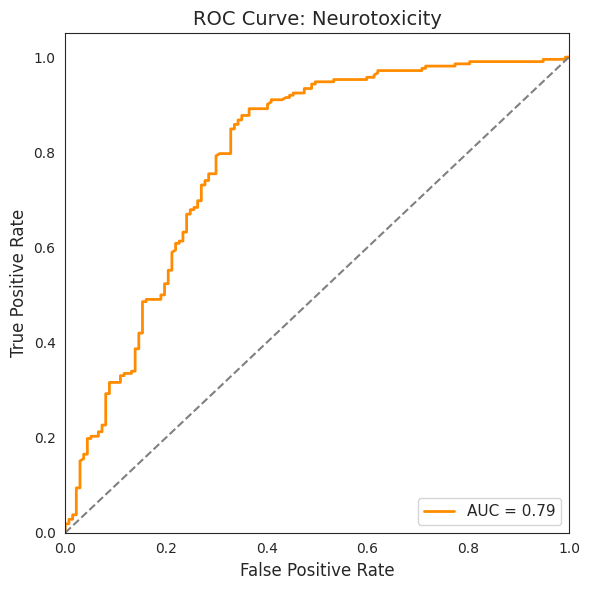

Saved: roc_curve_Neurotoxicity_X_MACCS.tiff


In [ ]:
# Load toxicity labels
selected_features_neuro = pd.read_csv("selected_feature_names_neuro_X_MACCS.csv", header=None).squeeze("columns").tolist()
label_metrics_neuro = pd.read_csv('label_metrics_neuro_X_MACCS.csv')
toxicity_names = label_metrics_neuro["Label"].tolist()

feature_name = "X_MACCS"
selected_toxicity = "Neurotoxicity"  # Change this to any toxicity name you want
output_filename = f"roc_curve_{selected_toxicity}_{feature_name}.tiff"

# Index Lookup
if selected_toxicity not in toxicity_names:
    raise ValueError(f"Toxicity '{selected_toxicity}' not found in toxicity_names.")
idx = toxicity_names.index(selected_toxicity)

# Extract Data
y_true = y_test_neuro.iloc[:, idx]
y_score = y_pred_proba_neuro.iloc[:, idx]

# Compute ROC & AUC
fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title(f"ROC Curve: {selected_toxicity}", fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.tight_layout()
plt.savefig(output_filename, dpi=300, format="tiff", bbox_inches="tight")
plt.show()

print(f"Saved: {output_filename}")

## Confusion Matrix

Confusion matrix saved as 'confusion_matrix_Neurotoxicity.tiff'


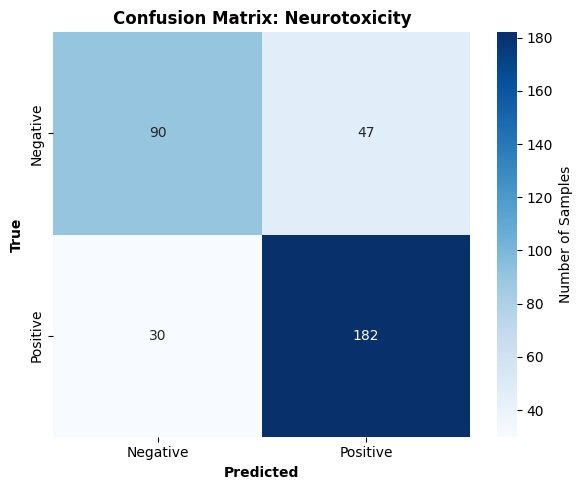

In [ ]:
from sklearn.metrics import confusion_matrix

# Load toxicity labels
selected_features_neuro = pd.read_csv("selected_feature_names_neuro_X_MACCS.csv", header=None).squeeze("columns").tolist()
label_metrics_neuro = pd.read_csv('label_metrics_neuro_X_MACCS.csv')
toxicity_names = label_metrics_neuro["Label"].tolist()

# Set up the figure for one confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))

# Choose the target label
label = "Neurotoxicity"
label_idx = toxicity_names.index(label)
y_true = y_test_neuro.iloc[:, label_idx]
y_pred = y_pred_binary_neuro.iloc[:, label_idx]

# Generate and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax, cbar_kws={'label': 'Number of Samples'})
ax.set_title(f"Confusion Matrix: {label}", fontweight='bold')
ax.set_xlabel("Predicted", fontweight='bold')
ax.set_ylabel("True", fontweight='bold')
ax.set_xticks([0.5, 1.5])
ax.set_yticks([0.5, 1.5])
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])

plt.tight_layout()
plt.savefig(f"confusion_matrix_neuro.tiff", dpi=300, format="tiff", bbox_inches="tight")
print(f"Confusion matrix saved as 'confusion_matrix_{label}.tiff'")

## SHAP

X_test_neuro shape: (349, 167)
Toxicity names: ['Cardiotoxicity', 'Developmental toxicity', 'Hepatotoxicity', 'Nephrotoxicity', 'Neurotoxicity', 'Reproductive toxicity']
X_test_sample shape: (349, 167)
X_test_sample_np shape: (349, 167)
Scaled X_test_sample shape: (349, 167)
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step
Model output shape: (349, 6)
Computed expected_value: [0.3004342  0.25524363 0.26863906 0.27923447 0.33753914 0.21457952]
Initializing SHAP Explainer...


PermutationExplainer explainer: 350it [00:21,  8.77it/s]


SHAP values shape: (349, 167, 6)
SHAP Explainer initialized successfully
Extracted SHAP values for Neurotoxicity with shape: (349, 167)


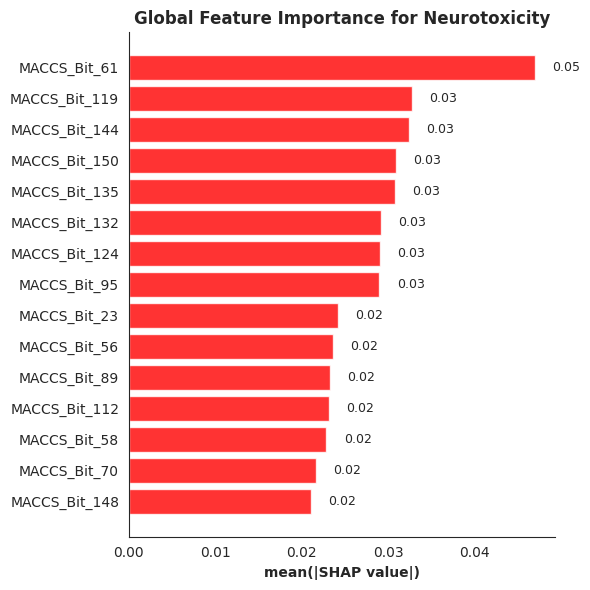

<ipython-input-53-05db00ec6a5c>:91: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_top, max_display=max_display, plot_size=(6, 6), show=False)


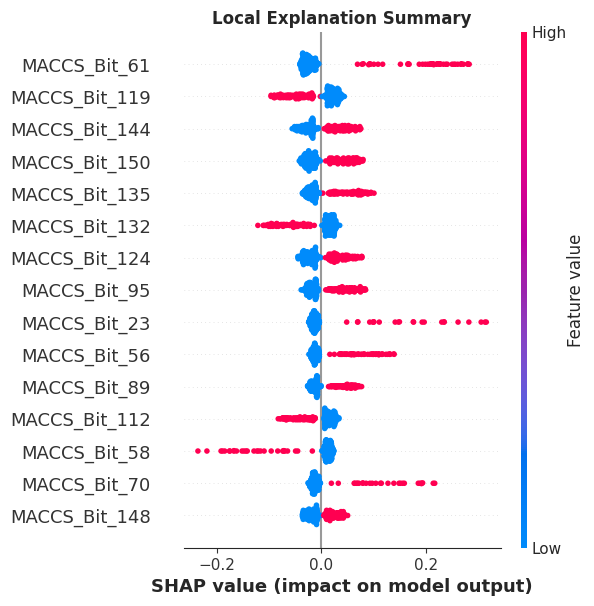


Top 15 features for Neurotoxicity:
1. MACCS_Bit_61: 0.0469
2. MACCS_Bit_119: 0.0327
3. MACCS_Bit_144: 0.0324
4. MACCS_Bit_150: 0.0308
5. MACCS_Bit_135: 0.0308
6. MACCS_Bit_132: 0.0292
7. MACCS_Bit_124: 0.0290
8. MACCS_Bit_95: 0.0290
9. MACCS_Bit_23: 0.0241
10. MACCS_Bit_56: 0.0236
11. MACCS_Bit_89: 0.0233
12. MACCS_Bit_112: 0.0232
13. MACCS_Bit_58: 0.0228
14. MACCS_Bit_70: 0.0216
15. MACCS_Bit_148: 0.0211


In [ ]:
import shap

sns.set_style("white")

# Load toxicity labels
selected_features_neuro = pd.read_csv("selected_feature_names_neuro_X_MACCS.csv", header=None).squeeze("columns").tolist()
label_metrics_neuro = pd.read_csv('label_metrics_neuro_X_MACCS.csv')
toxicity_names = label_metrics_neuro["Label"].tolist()

# Confirm shapes
print("X_test_neuro shape:", X_test_neuro.shape)
print("Toxicity names:", toxicity_names)

# Scale test features
X_test_sample = X_test_neuro
X_test_sample_np = X_test_sample.values
scaler = StandardScaler()
X_test_sample_np_scaled = scaler.fit_transform(X_test_sample_np)
print("X_test_sample shape:", X_test_sample.shape)
print("X_test_sample_np shape:", X_test_sample_np.shape)
print("Scaled X_test_sample shape:", X_test_sample_np_scaled.shape)

# Predict output
sample_predictions = best_model_neuro.predict(X_test_sample_np_scaled)
print("Model output shape:", sample_predictions.shape)
expected_value = np.mean(sample_predictions, axis=0)
print("Computed expected_value:", expected_value)

# Initialize SHAP Explainer
print("Initializing SHAP Explainer...")
explainer = shap.Explainer(lambda x: best_model_neuro(x, training=False), X_test_sample_np_scaled[:100])
shap_values = explainer(X_test_sample_np_scaled)
print(f"SHAP values shape: {shap_values.values.shape}")
print("SHAP Explainer initialized successfully")

# Select target class
selected_toxicities = ["Neurotoxicity"]
selected_toxicity_indices = []
for tox in selected_toxicities:
    if tox in toxicity_names:
        selected_toxicity_indices.append(toxicity_names.index(tox))
    else:
        print(f"Warning: '{tox}' not found in toxicity_names. Skipping.")

max_display = 15

for i in selected_toxicity_indices:
    label = toxicity_names[i]
    shap_values_class = shap_values[..., i]
    print(f"Extracted SHAP values for {label} with shape: {shap_values_class.shape}")

    # Rank features by mean absolute SHAP value
    mean_shap_values = np.abs(shap_values_class.values).mean(axis=0)
    feature_importance = list(zip(selected_features_neuro, mean_shap_values))
    feature_importance.sort(key=lambda x: x[1], reverse=True)

    # Filter non-zero features
    top_features = [f for f in feature_importance if f[1] > 0][:max_display]

    if len(top_features) == 0:
        print(f"No important features identified for {label}. Skipping plot.\n")
        continue

    # Top features
    top_feature_names = [f[0] for f in top_features]
    top_feature_indices = [selected_features_neuro.index(f) for f in top_feature_names]

    # Create new Explanation object with top features
    shap_values_top = shap.Explanation(
        values=shap_values_class.values[:, top_feature_indices],
        base_values=shap_values_class.base_values,
        data=X_test_sample_np_scaled[:, top_feature_indices],
        feature_names=[selected_features_neuro[i] for i in top_feature_indices]
    )

    # Plot 1: Global Feature Importance (Horizontal Bar Plot)
    fig, ax = plt.subplots(figsize=(6, 6))
    top_shap_vals = [v[1] for v in top_features]
    ax.barh(range(len(top_feature_names)), top_shap_vals, color='red', alpha=0.8)
    ax.set_yticks(range(len(top_feature_names)))
    ax.set_yticklabels(top_feature_names)
    ax.invert_yaxis()
    ax.set_xlabel('mean(|SHAP value|)', fontweight='bold')
    ax.set_title(f'Global Feature Importance for {label}', fontsize=12, fontweight='bold')
    fig.tight_layout()
    fig.savefig(f"shap_global_{label}_final.tiff", dpi=300, bbox_inches='tight')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

    #  Plot 2: Local Explanation Summary (SHAP Beeswarm Plot)
    shap.summary_plot(shap_values_top, max_display=max_display, plot_size=(6, 6), show=False)
    plt.title('Local Explanation Summary', fontsize=12, fontweight='bold')
    plt.xlabel('SHAP value (impact on model output)', fontweight='bold')
    plt.savefig(f"shap_beeswarm_{label}_final.tiff", dpi=300, bbox_inches='tight')
    plt.show()

    # Print feature info
    print(f"\nTop {max_display} features for {label}:")
    for idx, (name, val) in enumerate(top_features, 1):
        print(f"{idx}. {name}: {val:.4f}")

## Applicability Domain

Percent inside AD by endpoint and threshold:
threshold               3× average  95th percentile
endpoint                                           
Cardiotoxicity               100.0             94.3
Developmental toxicity       100.0             94.0
Hepatotoxicity               100.0             94.3
Neurotoxicity                100.0             94.0
Nephrotoxicity               100.0             94.3
Reproductive toxicity        100.0             94.3


<ipython-input-67-8b61eb0e575e>:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


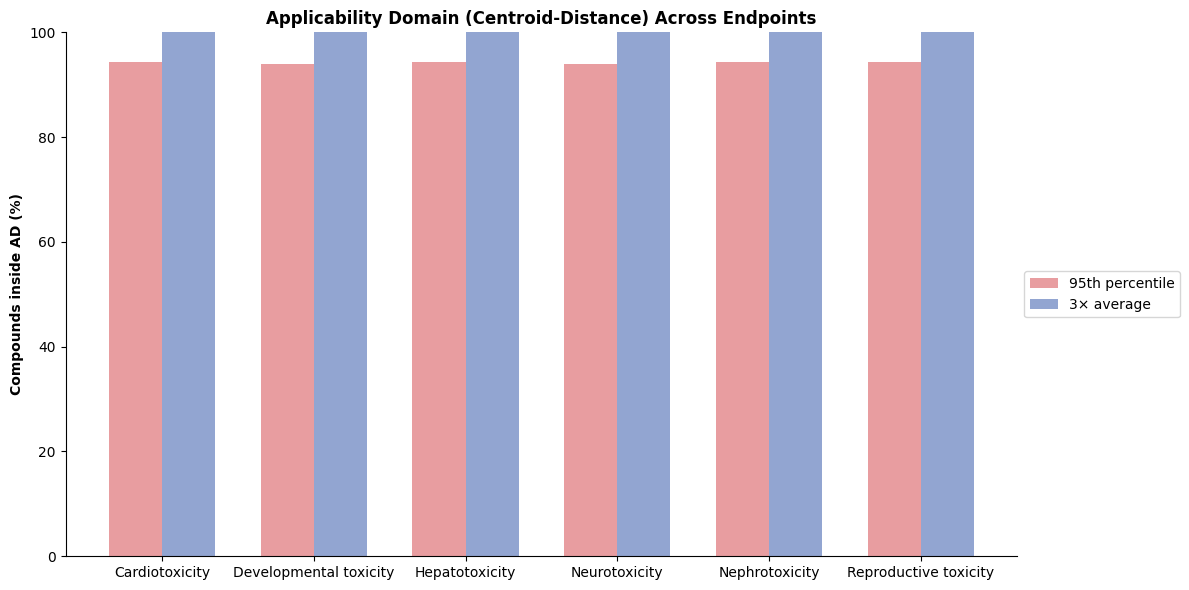

In [ ]:
# Define file mappings for each endpoint
endpoint_cfg = {
    'Neurotoxicity': {
        'X_train': 'X_train_outer_selected_neuro_X_MACCS.csv',
        'X_test':  'X_test_outer_selected_neuro_X_MACCS.csv',
    },
    'Developmental toxicity': {
        'X_train': 'X_train_outer_selected_rem_not_include_X_all.csv',
        'X_test':  'X_test_outer_selected_rem_not_include_X_all.csv',
    },
}
for ep in ['Cardiotoxicity','Hepatotoxicity','Nephrotoxicity','Reproductive toxicity']:
    endpoint_cfg[ep] = {
        'X_train': 'X_train_outer_selected_rem_include_X_all_tox21.csv',
        'X_test':  'X_test_outer_selected_rem_include_X_all_tox21.csv',
    }

# Compute AD metrics for each endpoint
records = []
for ep, files in endpoint_cfg.items():
    # load descriptors
    Xtr = pd.read_csv(files['X_train']).values
    Xte = pd.read_csv(files['X_test']).values

    # centroid and distances
    centroid = Xtr.mean(axis=0)
    d_train  = np.linalg.norm(Xtr - centroid, axis=1)
    d_test   = np.linalg.norm(Xte - centroid, axis=1)

    # thresholds
    t95   = np.percentile(d_train, 95)
    t3avg = 3 * d_train.mean()

    # percent inside AD
    pct95   = (d_test <= t95).mean()   * 100
    pct3avg = (d_test <= t3avg).mean() * 100

    records.append({'endpoint': ep, 'threshold': '95th percentile', 'pct_in_ad': pct95})
    records.append({'endpoint': ep, 'threshold': '3× average',    'pct_in_ad': pct3avg})

# Build DataFrame
df = pd.DataFrame(records)

# Pivot for plotting
desired_order = [
    'Cardiotoxicity',
    'Developmental toxicity',
    'Hepatotoxicity',
    'Neurotoxicity',
    'Nephrotoxicity',
    'Reproductive toxicity'
]
pivot = df.pivot(index='endpoint', columns='threshold', values='pct_in_ad')
pivot = pivot.reindex(desired_order)  # enforce custom order

# Print table
print("Percent inside AD by endpoint and threshold:")
print(pivot.round(1))

# Plot grouped bar chart
labels = pivot.index.tolist()
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xticklabels(labels)
ax.bar(x - width/2, pivot['95th percentile'], width, label='95th percentile', color='#E89DA0')
ax.bar(x + width/2, pivot['3× average'],    width, label='3× average',    color='#92A5D1')

ax.set_xticks(x)
ax.set_ylabel('Compounds inside AD (%)', fontweight='bold')
ax.set_title('Applicability Domain (Centroid‐Distance) Across Endpoints', fontweight='bold')
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(f"AD_tox.tiff", dpi=300, format="tiff", bbox_inches="tight")
plt.tight_layout()
plt.show()